In [45]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [46]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [32]:
data_dir = '/content/drive/MyDrive/PlantDisease/Data'
categories = os.listdir(data_dir)

#Load images and labels
images = []
labels = []

for category in categories:
  print(category)
  folder_path = os.path.join(data_dir,category)
  for img_file in os.listdir(folder_path):
      img_path = os.path.join(folder_path,img_file)
      img = cv2.imread(img_path)
      if img is not None:
        img =cv2.resize(img,(64,64))
        images.append(img)
        labels.append(category)

# Convert images and labels to numpy arrays
images = np.array(images)


Tomato___healthy
Tomato___Early_blight
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___Target_Spot
Tomato___Late_blight
Tomato___Bacterial_spot


In [33]:
# Convert to numpy arrays
x = np.array(images)
y = np.array(labels)

print("Labels:",np.unique(y))
print("Data Shape:",x.shape)

Labels: ['Tomato___Bacterial_spot' 'Tomato___Early_blight' 'Tomato___Late_blight'
 'Tomato___Target_Spot' 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
 'Tomato___Tomato_mosaic_virus' 'Tomato___healthy']
Data Shape: (12997, 64, 64, 3)


Class Distribution
Tomato___Tomato_Yellow_Leaf_Curl_Virus    1961
Tomato___Early_blight                     1930
Tomato___healthy                          1926
Tomato___Late_blight                      1861
Tomato___Target_Spot                      1827
Tomato___Tomato_mosaic_virus              1790
Tomato___Bacterial_spot                   1702
Name: count, dtype: int64


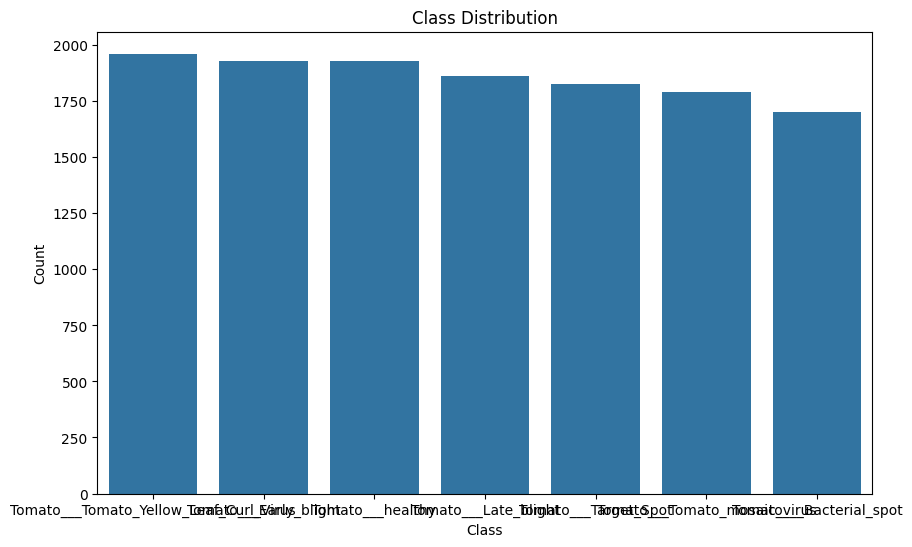

In [34]:
class_counts = pd.Series(y).value_counts()
print("Class Distribution")
print(class_counts)

#Plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index,y=class_counts.values)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

In [35]:
# Remove corrupted images()
valid_images = []
valid_labels = []

for img, label in zip(x,y):
  if img.shape == (64,64,3):
    valid_images.append(img)
    valid_labels.append(label)

x = np.array(valid_images)
y = np.array(valid_labels)

print("Cleaned Data Shape: ",x.shape)

Cleaned Data Shape:  (12997, 64, 64, 3)


In [36]:
# Encode Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Save class names for later use
class_names = le.classes_
class_names

array(['Tomato___Bacterial_spot', 'Tomato___Early_blight',
       'Tomato___Late_blight', 'Tomato___Target_Spot',
       'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype='<U38')

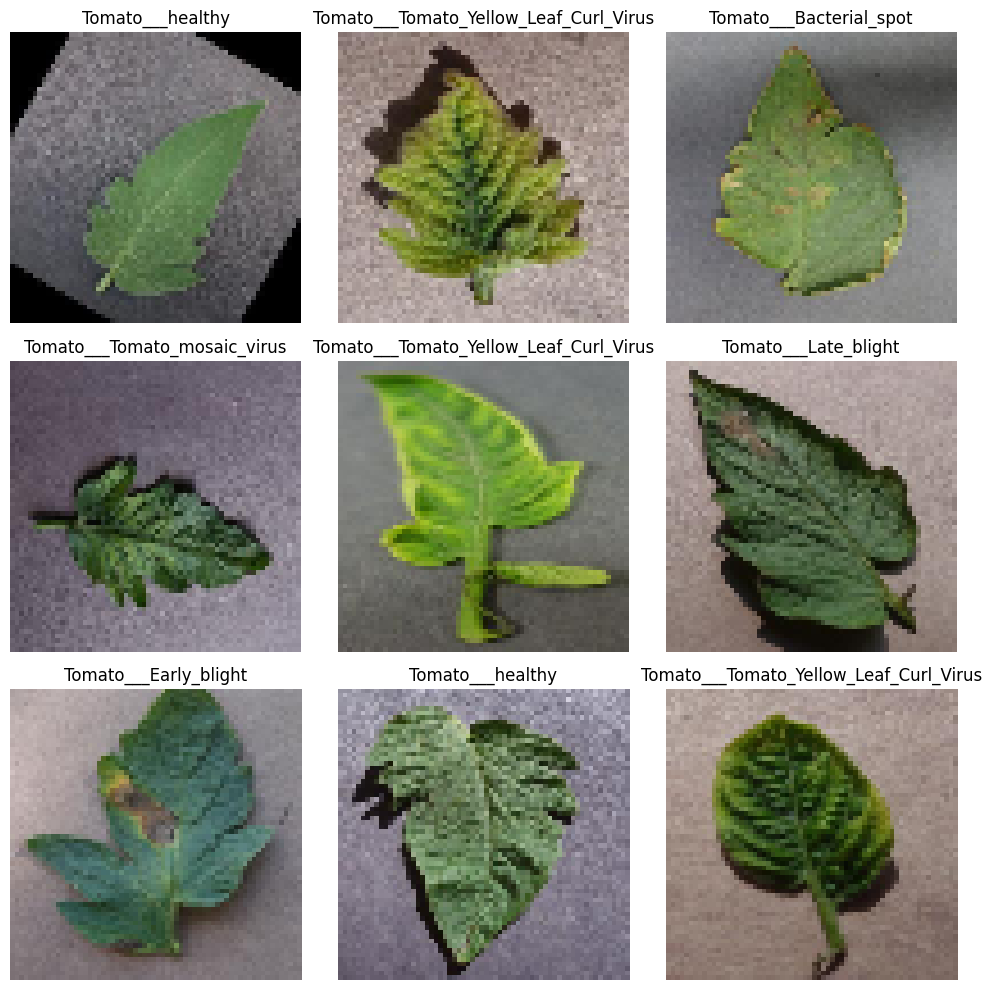

In [37]:
import random
plt.figure(figsize=(10,10))
for i in range(9):
  idx = random.randint(0,len(x))
  plt.subplot(3, 3, i+1)
  plt.imshow(cv2.cvtColor(x[idx], cv2.COLOR_BGR2RGB))
  plt.title(class_names[y_encoded[idx]])
  plt.axis('off')
plt.tight_layout()
plt.show()

In [38]:
def extract_color_histogram(image, bins=(8, 8, 8)):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  hist = cv2.calcHist([image], [0,1,2],None,bins,[0,256,0,256,0,256])
  hist = cv2.normalize(hist,hist).flatten()
  return hist

hist_features = [extract_color_histogram(img) for img in x]
x_features = np.array(hist_features)

In [39]:
x_features.shape

(12997, 512)

In [40]:
# Choose model
model = SVC(kernel='rbf', C=10, gamma='scale')

In [41]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(x_features, y_encoded, test_size=0.2, random_state=42)

# Train model
model.fit(X_train,y_train)

#Predict
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

#Accuracy
acc = accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

F1 Score: 0.9730985325005893


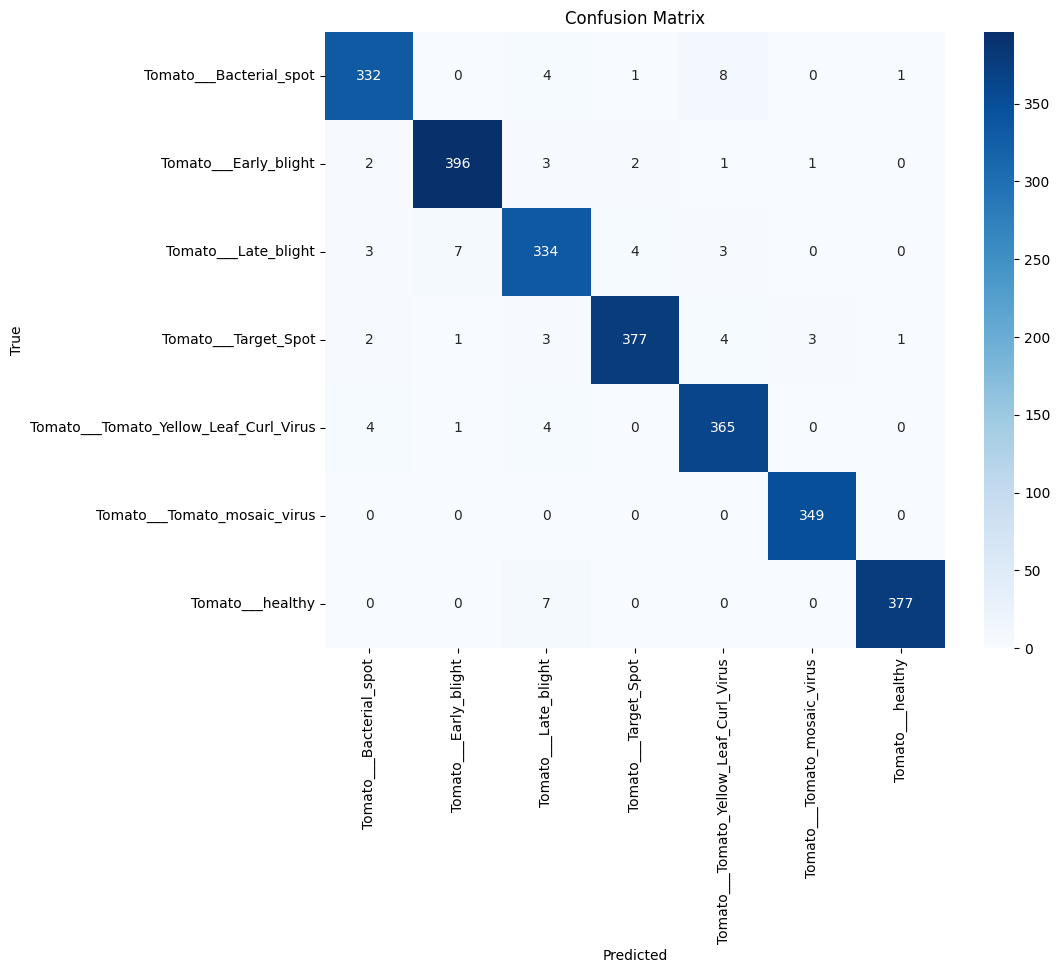

In [43]:
#F1 Score
f1 = f1_score(y_test,y_pred,average='weighted')
print("F1 Score:",f1)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

#Plot Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [44]:
#Classification Report
print("Classification Report:")
print(classification_report(y_test,y_pred,target_names=class_names))

Classification Report:
                                        precision    recall  f1-score   support

               Tomato___Bacterial_spot       0.97      0.96      0.96       346
                 Tomato___Early_blight       0.98      0.98      0.98       405
                  Tomato___Late_blight       0.94      0.95      0.95       351
                  Tomato___Target_Spot       0.98      0.96      0.97       391
Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.96      0.98      0.97       374
          Tomato___Tomato_mosaic_virus       0.99      1.00      0.99       349
                      Tomato___healthy       0.99      0.98      0.99       384

                              accuracy                           0.97      2600
                             macro avg       0.97      0.97      0.97      2600
                          weighted avg       0.97      0.97      0.97      2600

